<a href="https://colab.research.google.com/github/Gonzales-James/DSP/blob/main/Final_Project/DSP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necessary libraries

In [ ]:
!pip install python_speech_features
!pip install SpeechRecognition
!pip install pipwin
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio
!pip install pydub

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=c1b86fb32cf550a3d5962a3319cfa86589d97213b89a6cb8d6f89b1c515dadfe
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features
     |████████████████████████████████| 32.8 MB 121 kB/s 
     |████████████████████████████████| 128 kB 3.2 MB/s 
     |████████████████████████████████| 1.0 MB 26.8 MB/s 
  Created wheel for pipwin: filename=pipwin-0.5.2-py2.py3-none-any.whl size=8791 sha256=0ec9d969f82e3ca2750bc6194f4ca3a19443becf969f2be94fe67c8a9c462ccf
  Stored in directory: /root/.cache/pip/wheels/07/df/15/51b9c5d152e27b7fad998993eba50e15dfa709cc7438557f7e
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=26000 sha256=c6e51af1286c0415c991dacfc0e83d3e71c0c4105987b6a11a5b5c31f4e87271
  Stored in directory: /root/.cache/pip/wheels/2a/80/ac/dcd2bdbd03dd2b7b7e2bf3e5a

# Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# record function
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

# mfcc features
from python_speech_features import mfcc, logfbank

# displaying audio file
import IPython.display as ipd 

# for speech recognition 
import speech_recognition as speech_recog

# mp3 to wav
from google.colab import files
import os,subprocess,sys
from glob import glob
from subprocess import Popen, PIPE, getoutput, CalledProcessError
os.chdir('/content/')
output_path=os.getcwd()+'/'

from pydub import AudioSegment

# Audio Signal Processing

## Reading Audio Files

In [ ]:
!gdown https://drive.google.com/uc?id=1mzP31rGgbYBD-QJkkTMKSDOO-Sfz1tUO

Downloading...
From: https://drive.google.com/uc?id=1mzP31rGgbYBD-QJkkTMKSDOO-Sfz1tUO
To: /content/Greetings.wav
100% 885k/885k [00:00<00:00, 125MB/s]


In [ ]:
# Using IO module to read Audio Files
freq_sample, sig_audio = wavfile.read("/content/Greetings.wav")

In [ ]:
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')


Shape of Signal: (442368,)
Signal Datatype: int16
Signal duration: 9.22 seconds


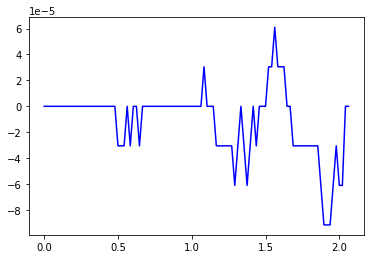

In [ ]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)
plt.plot(time_axis, pow_audio_signal, color='blue')

## Transforming Audio Frequencies

In [ ]:
sig_audio = sig_audio / np.power(2, 15)

In [ ]:
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)
# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)
# Normalize the frequency domain and square it 
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


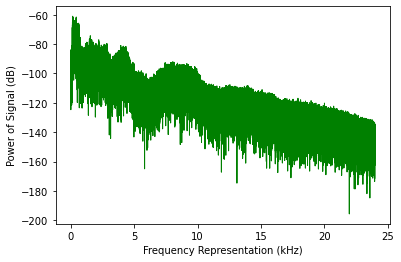

In [ ]:
# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
    signal_freq[1:transform_len] *= 2
else:
    signal_freq[1:transform_len-1] *= 2
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.figure()
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('Frequency Representation (kHz)')
plt.ylabel('Power of Signal (dB)')
plt.show()

## Extraction of Features from Speech

In [ ]:
sampling_freq, sig_audio = wavfile.read("/content/Greetings.wav")

In [ ]:
# We will now be taking the first 15000 samples from the signal for analysis
sig_audio = sig_audio[:15000]
# Using MFCC to extract features from the signal
mfcc_feat = mfcc(sig_audio, sampling_freq)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])


MFCC Parameters
Window Count = 30
Individual Feature Length = 13


Text(0.5, 1.05, 'MFCC Features')

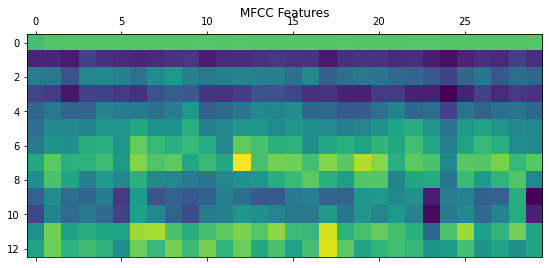

In [ ]:
mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)
plt.title('MFCC Features')

In [ ]:
# The first horizontal yellow lines below every segment are the fundamental frequency and at its strongest. Above the yellow line are the harmonics that share the same frequency distance between them
# Generating filter bank features
fb_feat = logfbank(sig_audio, sampling_freq)
print('\nFilter bank\nWindow Count =', fb_feat.shape[0])
print('Individual Feature Length =', fb_feat.shape[1])


Filter bank
Window Count = 30
Individual Feature Length = 26


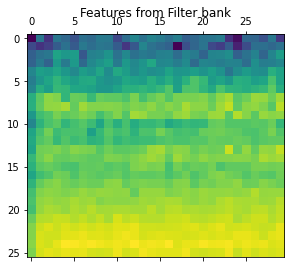

In [ ]:
fb_feat = fb_feat.T
plt.matshow(fb_feat)
plt.title('Features from Filter bank')
plt.show()

# Defining necessary functions for Speech Recognition

In [ ]:
# Javascript script for recording audio
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

# Function for recording audio
def record(sec=3): 
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream

In [ ]:
# Creating a recording object to store input
rec = speech_recog.Recognizer()

# Function for conversion of MP3 to WAV
def MP3_to_WAV(MP3_file):
   sound = AudioSegment.from_mp3(MP3_file)
   filename = os.path.basename(MP3_file)
   wav_file_name="converted"+filename.split('.')[0]+'.wav'
   sound.export(wav_file_name, format="wav")

In [ ]:
# Generating a WAV file
def generate_fine_wav(audio):
  with open('recording.wav', mode='bx') as f:
    f.write(audio)
  
  AudioSegment.from_file("recording.wav").export("recording.mp3", format="mp3")

  MP3_to_WAV('recording.mp3')

  with speech_recog.WavFile("/content/convertedrecording.wav") as source: # use "test.wav" as the audio source 
    audio1 = rec.record(source) # extract audio data from the file 

  return audio1

#Speech Recognition

In [ ]:
def sp_rec():
  audio = record(5) # Run to start recording audio; recording time can be adjusted

  ipd.display(ipd.Audio(audio)) # Display recorded audio

  audio1 = generate_fine_wav(audio) # Convert audio to WAV file

  # Execute speech prediction/recognition
  # If output is blank, it could not understand the audio
  try:
    print("I think you said: \n" + rec.recognize_google(audio1))
  except Exception as e:
    print(e)

  # Clean up files before recording audio again
  path1 = os.path.join("/content/", "convertedrecording.wav")
  path2 = os.path.join("/content/", "recording.mp3")
  path3 = os.path.join("/content/", "recording.wav")
  os.remove(path1)
  os.remove(path2)
  os.remove(path3)

In [ ]:
sp_rec()

Speak Now...


<IPython.core.display.Javascript object>

Done Recording !


I think you said: 
if you receive this message I hope you're doing well
